In [1]:
from typing import Callable
from canonicalize_psmiles.canonicalize import canonicalize as ext_canonicalize

def copy_doc(copy_func: Callable) -> Callable:
    """Use Example: copy_doc(self.copy_func)(self.func) or used as deco"""
    def wrapper(func: Callable) -> Callable:
        func.__doc__ = copy_func.__doc__
        return func
    return wrapper

class Test:
    def foo(self) -> None:
        """Woa"""
        pass

    @property
    @copy_doc(ext_canonicalize)
    def this(self):
        pass

    @property
    def this22(self):
        """TEst"""
        return 22
 
Test().this.__doc__
Test().this22.__doc__


"int([x]) -> integer\nint(x, base=10) -> integer\n\nConvert a number or string to an integer, or return 0 if no arguments\nare given.  If x is a number, return x.__int__().  For floating point\nnumbers, this truncates towards zero.\n\nIf x is not a number or if base is given, then x must be a string,\nbytes, or bytearray instance representing an integer literal in the\ngiven base.  The literal can be preceded by '+' or '-' and be surrounded\nby whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.\nBase 0 means to interpret the base from the string as an integer literal.\n>>> int('0b100', base=0)\n4"

In [2]:
%load_ext autoreload
%autoreload 2


In [12]:
from psmiles import PolymerSmiles as PS

fp_names = ['ci', 'rdkit', 'mordred',]

fps = []

for fp in fp_names:
    score = PS('[*]COCC[*]').is_similar(PS('[*]CCO[*]'), fp)
    fps.append(score)

fps

[0.80257, 0.70296, 0.15452]

SMILES: [*]COCCC(C)C[*]


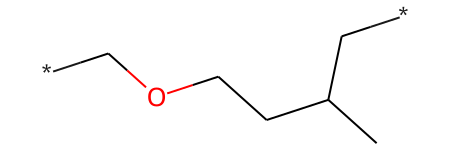

In [ ]:
PolymerSmiles('[*]COC[*]').alternating_copolymer('[*]CC(C)C[*]', [1,1])

DEBUG:root:(1) Combine both PSMILES


SMILES: *CC(*)C(=O)OCCCC.*COCO* |atomProp:0.dummyLabel.*:3.dummyLabel.*:11.dummyLabel.*:16.dummyLabel.*|


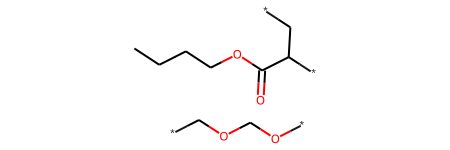

DEBUG:root:(2) Add bond: [1, 1]


SMILES: *COCO*~*C(C*)C(=O)OCCCC |atomProp:0.dummyLabel.*:5.dummyLabel.*:6.dummyLabel.*:9.dummyLabel.*|


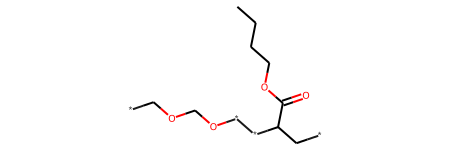

SMILES: [*]COCOC(C[*])C(=O)OCCCC


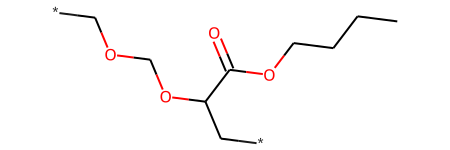

In [ ]:
import logging
from psmiles.psmiles import PolymerSmiles

logging.getLogger().setLevel(logging.DEBUG)
PolymerSmiles('[*]COCO[*]').alternating_copolymer('[*]CC([*])C(=O)OCCCC', [1,1])

DEBUG:root:(1) Get connection info 
 {'atom_rings': (),
 'bond_rings': (),
 'index': [0, 1, 2, 3, 4, 5],
 'neighbor': {'atom_type': [['C'], ['O']],
              'bond_type': [[rdkit.Chem.rdchem.BondType.SINGLE],
                            [rdkit.Chem.rdchem.BondType.SINGLE]],
              'index': [[1], [4]],
              'path': (1, 2, 3, 4)},
 'star': {'atom_type': ['*', '*'], 'bond_type': None, 'index': [0, 5]},
 'stereo': [],
 'symbols': ['*', 'C', 'O', 'C', 'O', '*']}


SMILES: *COCO* |atomProp:0.dummyLabel.*:5.dummyLabel.*|


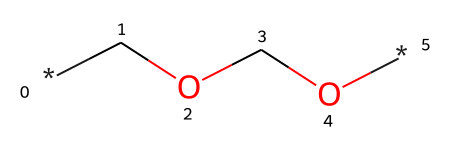

DEBUG:root:(2) Combine two mols


SMILES: *COCO*.*COCO* |atomProp:0.dummyLabel.*:5.dummyLabel.*:6.dummyLabel.*:11.dummyLabel.*|


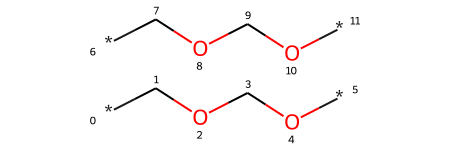

DEBUG:root:(3) Connect star atoms 0 and 11 with bond_type = rdkit.Chem.rdchem.BondType.SINGLE


SMILES: *COCO**COCO* |atomProp:0.dummyLabel.*:5.dummyLabel.*:6.dummyLabel.*:11.dummyLabel.*|


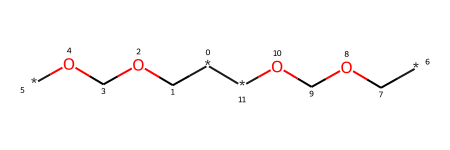

DEBUG:root:(4) Remove {'**': '', '//': '/', '\\\\': '\\', '==': '=', '##': '#', '\\/': '\\'} pattern *COCO**COCO*
DEBUG:root:Replacing ** with : *COCOCOCO*
DEBUG:root:Replacing // with /: *COCOCOCO*
DEBUG:root:Replacing \\ with \: *COCOCOCO*
DEBUG:root:Replacing == with =: *COCOCOCO*
DEBUG:root:Replacing ## with #: *COCOCOCO*
DEBUG:root:Replacing \/ with \: *COCOCOCO*


SMILES: *COCOCOCO* |atomProp:0.dummyLabel.*:9.dummyLabel.*|


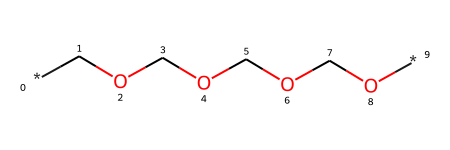

SMILES: [*]COCOCOCO[*]


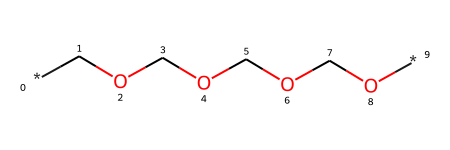

In [ ]:
import logging
from psmiles.psmiles import PolymerSmiles

logging.getLogger().setLevel(logging.DEBUG)
PolymerSmiles('[*]COCO[*]').dimer(1)

In [8]:

from psmiles.psmiles import PolymerSmiles

sms = [
    "C([*])C/C=C\\[*]",
    "[*]/C=C\\CC[*]",
    "C(\\[*])=C\\CC[*]",
    "[*]CC/C=C\\[*]",
    "C(\\CC[*])=C\\[*]",
    "C(=C\\CC[*])\\[*]",
    "[*]/C=C\\CC[*]",
    "C(C/C=C\\[*])[*]",
    "C(\\[*])=C\\CC[*]",
    "[*]/C=C\\CC[*]",
]

dimerized = []
for s in sms:
    dimerized.append(PolymerSmiles(s).canonicalize.dimer().psmiles)
one_smiles = list(set(dimerized))
one_smiles

['[*]=CCCC=CCCC=[*]']